In [220]:
import numpy as np
import math
import pandas as pd
from math import log
e = math.exp(1)
data = pd.read_csv('泰坦尼克号数据.csv')
data = data.replace('',np.NaN)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [221]:
data = data.drop(columns='Cabin')
data = data.drop(columns='PassengerId')
data = data.drop(columns='Name')
data = data.drop(columns='Ticket')
data = data.drop(columns='Fare')
null_all = data.isnull().sum()
null_all

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [222]:
data.loc[:,"Age"] = data.fillna(data.loc[:,"Age"].median())

In [223]:
copy = data.copy()
copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [224]:
from sklearn.preprocessing import LabelEncoder

data.iloc[:,2] = LabelEncoder().fit_transform(data.iloc[:,2])
data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


In [225]:
for i in data.columns:
    if i!= "Embarked":
        data[i] = (data[i] - min(data[i])) / (max(data[i])-min(data[i]))
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0.0,1.0,1.0,0.271174,0.125,0.0,S
1,1.0,0.0,0.0,0.472229,0.125,0.0,C
2,1.0,1.0,0.0,0.321438,0.000,0.0,S
3,1.0,0.0,0.0,0.434531,0.125,0.0,S
4,0.0,1.0,1.0,0.434531,0.000,0.0,S


In [226]:
new_data = data.copy()
def loaddata(data,label):
    datax = data[data[[label]].isnull().T.any()]
    for i in datax.index:
        data = data.drop(i)
    return data , datax




In [227]:
data , datax = loaddata(data,'Embarked')
ans = 0

In [228]:
def getNeighbors(trainingSet, testInstance, k):
    answer = {}
    for j in range(testInstance.shape[0]):
        distances = []
        distance0 = 0
        for x in range(trainingSet.shape[0]):
            for n in range(trainingSet.shape[1]):
                if n != trainingSet.shape[1]-1:
                    distance0 += (trainingSet.iloc[x,n]-testInstance.iloc[j,n])**2
            dist = (distance0)**0.5
            distances.append([trainingSet.iloc[x,:], dist])
        distances.sort(key = lambda x :x[-1])
        neighbors = []
        for x in range(k):
            neighbors.append(distances[x]) 
        classVotes = {}
        for i in range (len(neighbors)):
            response = neighbors [x][0][-1]
            if response in classVotes:
                classVotes[response] += 1
            else:
                classVotes[response] = 1
        sortedVotes = sorted(classVotes.items(), reverse=True)
        answer[j]=sortedVotes[0][0]
    return answer

In [229]:
neighbors=getNeighbors(data,datax,4)
neighbors[0]
for i in range(datax.shape[0]):
   datax.iloc[i,-1]=neighbors[i]
data = pd.concat([data,datax])
index01= np.arange(data.shape[0])
data.index = index01
copy.iloc[:,[-1]] = data.iloc[:,[-1]]
data = copy
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [230]:
epsilon=0.00000000000001

In [231]:
def calc_possibility(data):
    feature = {}
    for i in range(len(data)):
        if data[i][0] not in feature:
            feature[data[i][0]]=0
        feature[data[i][0]]+=1
    return feature



def calc_gini(data,column):
    data_length = len(data)
    feature_sets = {}
    gini = 0
    for i in range(data_length):
        feature = data[i][column]
        if feature not in feature_sets:
            feature_sets[feature] = []
        feature_sets[feature].append(data[i])
    for i in feature_sets:
        gini += (1- sum([((p/len(feature_sets[i]))**2) for p in calc_possibility(feature_sets[i]).values()]))*len(feature_sets[i])/data_length
    return gini


def origin_gini(data):
    data_length = len(data)
    feature_sets={}
    for i in range(data_length):
        feature = data[i][0]
        if feature not in feature_sets:
            feature_sets[feature] = 0
        feature_sets[feature] += 1
    return 1-sum([(p/data_length)**2 for p in feature_sets.values()])

def gini_gain(a,b):
    return a-b

def calc_regression(data,column):
    data_length = len(data)
    feature_sets = {}
    error = {}
    for i in range (data_length):
        feature = data[i][column]
        if feature not in feature_sets:
            feature_sets[feature] = []
        feature_sets[feature].append(data[i][0])
    for i in feature_sets:
        datasets={}
        datasets[0]=[]
        datasets[1]=[]
        for j in feature_sets:
            if j <= i :
                for p in range(len(feature_sets[j])):
                    datasets[1].append(feature_sets[j][p])
            else:
                for p in range(len(feature_sets[j])):
                    datasets[0].append(feature_sets[j][p])
        ave01 = np.array(datasets[1]).mean()
        if datasets[0] == []:
            ave02 = 0
        else:
            ave02 = np.array(datasets[0]).mean()
        error[i] =sum([(p-ave01)**2 for p in np.array(datasets[1])]) + sum([(p-ave02)**2 for p in np.array(datasets[0])])
    error = sorted(error.items(),key=lambda x : x[1])
    return error[0][0]




def train_gini(data):
    gini={}
    for i in range(data.shape[1]-1):
        origin = origin_gini(np.array(data))
        after= calc_gini(np.array(data),i+1)
        gini[data.columns[i+1]]=gini_gain(origin,after)
    gini= sorted(gini.items(),key= lambda x : x[1],reverse=True)
    return gini[0][0], gini[0][1]


def change (data,i,column):
    for j in range(data.shape[0]):
        if data.iloc[j,column]<= i:
            data.iloc[j,column] = f"<={i}"
        else:
            data.iloc[j,column] = f">{i}"




def get_feature(data):
    feature = {}
    for i in data:
        if i not in feature:
            feature[i]={}
    return feature


def max_feature(data):
    c={}
    for i in np.array(data.iloc[:,0]):
        if i not in c:
            c[i] = 0
        c[i] += 1
    d=sorted(c.items(),key=lambda x:x[1],reverse=True)
    return d[0][0]


def calc_accuracy(data,label):
    counts = 0
    for i in data.iloc[:,0]:
        if i == label:
            counts += 1
    return counts/data.shape[0]



def build_tree(data):
    tree = {}
    a,b=train_gini(data)
    dataset={}
    #1.若D中实例属于同一类Ck，则T为单节点树，并将类Ck作为结点的类标记，返回T
    if len(data['Survived'].value_counts()) == 1:
        return data.iloc[0,0]
    #2.若A为空，则T为单节点树，将D中实例树最大的类Ck作为该节点的类标记，返回T
    if data.shape[1]==1:
        return max_feature(data)
    #3.信息增益小于阈值eta,则置T为单节点树，并将D中是实例数最大的类Ck作为该节点的类标记，返回T
    if b < epsilon:
        return max_feature(data)
    tree[a]=get_feature(data.loc[:,a])
    for i in tree[a]:
        index = np.array(np.where(data[a]==i))[0]
        dataset[i] = data.iloc[index,:]
    data.drop(columns = a)
    #4.预剪枝策略，如果该分类没有带来预测精度的提升，则不进行划分，返回该节点的投票值作为节点类别
    # origin_accuracy = calc_accuracy(data, max_feature(data))
    # after_accuracy = 0
    # for i in dataset:
    #     after_accuracy += calc_accuracy(dataset[i],max_feature(dataset[i])) * dataset[i].shape[0]/data.shape[0]
    # if after_accuracy <= origin_accuracy:
    #     return max_feature(data)
    #预剪枝到这里结束，可以取消预剪枝策略
    for i in tree[a]:
        tree[a][i] = build_tree(dataset[i])
    return tree
    

In [232]:
a = (calc_regression(np.array(data), 1))
b = (calc_regression(np.array(data), 3))
c = (calc_regression(np.array(data), 4))
d = (calc_regression(np.array(data), 5))
change(data,a,1) 
change(data,b,3)
change(data,c,4)
change(data,d,5)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,>2,male,>6.0,>0,<=0,S
1,1,<=2,female,>6.0,>0,<=0,C
2,1,>2,female,>6.0,<=0,<=0,S
3,1,<=2,female,>6.0,>0,<=0,S
4,0,>2,male,>6.0,<=0,<=0,S


In [233]:
My_tree = build_tree(data)
My_tree

{'Sex': {'male': {'Age': {'>6.0': {'Pclass': {'>2': {'Embarked': {'S': {'SibSp': {'>0': {'Parch': {'<=0': 0,
            '>0': 0}},
          '<=0': {'Parch': {'<=0': 0, '>0': 0}}}},
        'Q': {'SibSp': {'<=0': {'Parch': {'<=0': 0, '>0': 0}}, '>0': 0}},
        'C': {'Parch': {'<=0': {'SibSp': {'<=0': 0, '>0': 0}}, '>0': 0}}}},
      '<=2': {'SibSp': {'<=0': {'Embarked': {'S': {'Parch': {'<=0': 0,
            '>0': 0}},
          'C': {'Parch': {'<=0': 0, '>0': 0}},
          'Q': {'Parch': {'>0': 0, '<=0': 0}}}},
        '>0': {'Embarked': {'S': {'Parch': {'>0': 0, '<=0': 0}},
          'C': {'Parch': {'<=0': 0, '>0': 1}},
          'Q': 0}}}}}},
    '<=6.0': {'Pclass': {'>2': {'SibSp': {'>0': {'Embarked': {'S': 0,
          'Q': 0,
          'C': 0}},
        '<=0': 1}},
      '<=2': 1}}}},
  'female': {'Pclass': {'<=2': {'Age': {'>6.0': {'Embarked': {'C': {'SibSp': {'>0': 1,
          '<=0': {'Parch': {'<=0': 1, '>0': 1}}}},
        'S': {'SibSp': {'>0': {'Parch': {'<=0': 1, '>0'

In [234]:
# 树信息统计 叶子节点数量 和 树深度

def getTreeSize(decisionTree):
    nodeName = list(decisionTree.keys())[0]
    nodeValue = decisionTree[nodeName]
    leafNum = 0
    treeDepth = 0 
    leafDepth = 0
    for val in nodeValue.keys():
        if type(nodeValue[val]) == dict:
            leafNum += getTreeSize(nodeValue[val])[0]  #这里采用递归的方式进入字典
            leafDepth = 1 + getTreeSize(nodeValue[val])[1] 
        else :
            leafNum += 1 
            leafDepth = 1 
        treeDepth = max(treeDepth, leafDepth)
    return leafNum, treeDepth 


# 使用模型对其他数据分类
def dtClassify(decisionTree, rowData, names):
    names = list(names)
    # 获取特征
    feature = list(decisionTree.keys())[0]
    # 决策树对于该特征的值的判断字段
    featDict = decisionTree[feature]
    # 获取特征的列
    feat = names.index(feature)
    # 获取数据该特征的值
    featVal = rowData[feat]
    # 根据特征值查找结果，如果结果是字典说明是子树，调用本函数递归
    if featVal in featDict.keys():
        if type(featDict[featVal]) == dict:
            classLabel = dtClassify(featDict[featVal], rowData, names)
        else:
            classLabel = featDict[featVal] #递归的边界条件
    return classLabel

In [235]:
# 可视化 主要源自《机器学习实战》
# 都是抄的。。。。。。
import matplotlib.pyplot as plt 

decisionNodeStyle = dict(boxstyle = "sawtooth", fc = "0.8")
leafNodeStyle = {"boxstyle": "round4", "fc": "0.8"}
arrowArgs = {"arrowstyle": "<-"}


# 画节点
def plotNode(nodeText, centerPt, parentPt, nodeStyle):
    createPlot.ax1.annotate(nodeText, xy = parentPt, xycoords = "axes fraction", xytext = centerPt
                            , textcoords = "axes fraction", va = "center", ha="center", bbox = nodeStyle, arrowprops = arrowArgs)


# 添加箭头上的标注文字
def plotMidText(centerPt, parentPt, lineText):
    xMid = (centerPt[0] + parentPt[0]) / 2.0
    yMid = (centerPt[1] + parentPt[1]) / 2.0 
    createPlot.ax1.text(xMid, yMid, lineText)
    
    
# 画树
def plotTree(decisionTree, parentPt, parentValue):
    # 计算宽与高
    leafNum, treeDepth = getTreeSize(decisionTree) 
    # 在 1 * 1 的范围内画图，因此分母为 1
    # 每个叶节点之间的偏移量
    plotTree.xOff = plotTree.figSize / (plotTree.totalLeaf - 1)
    # 每一层的高度偏移量
    plotTree.yOff = plotTree.figSize / plotTree.totalDepth
    # 节点名称
    nodeName = list(decisionTree.keys())[0]
    # 根节点的起止点相同，可避免画线；如果是中间节点，则从当前叶节点的位置开始，
    #      然后加上本次子树的宽度的一半，则为决策节点的横向位置
    centerPt = (plotTree.x + (leafNum - 1) * plotTree.xOff / 2.0, plotTree.y)
    # 画出该决策节点
    plotNode(nodeName, centerPt, parentPt, decisionNodeStyle)
    # 标记本节点对应父节点的属性值
    plotMidText(centerPt, parentPt, parentValue)
    # 取本节点的属性值
    treeValue = decisionTree[nodeName]
    # 下一层各节点的高度
    plotTree.y = plotTree.y - plotTree.yOff
    # 绘制下一层
    for val in treeValue.keys():
        # 如果属性值对应的是字典，说明是子树，进行递归调用； 否则则为叶子节点
        if type(treeValue[val]) == dict:
            plotTree(treeValue[val], centerPt, str(val))
        else:
            plotNode(treeValue[val], (plotTree.x, plotTree.y), centerPt, leafNodeStyle)
            plotMidText((plotTree.x, plotTree.y), centerPt, str(val))
            # 移到下一个叶子节点
            plotTree.x = plotTree.x + plotTree.xOff
    # 递归完成后返回上一层
    plotTree.y = plotTree.y + plotTree.yOff
    
    
# 画出决策树
def createPlot(decisionTree):
    fig = plt.figure(1, facecolor = "white")
    fig.clf()
    axprops = {"xticks": [], "yticks": []}
    createPlot.ax1 = plt.subplot(111, frameon = False, **axprops)
    # 定义画图的图形尺寸
    plotTree.figSize = 1.5 
    # 初始化树的总大小
    plotTree.totalLeaf, plotTree.totalDepth = getTreeSize(decisionTree)
    # 叶子节点的初始位置x 和 根节点的初始层高度y
    plotTree.x = 0 
    plotTree.y = plotTree.figSize
    plotTree(decisionTree, (plotTree.figSize / 2.0, plotTree.y), "")
    plt.show()

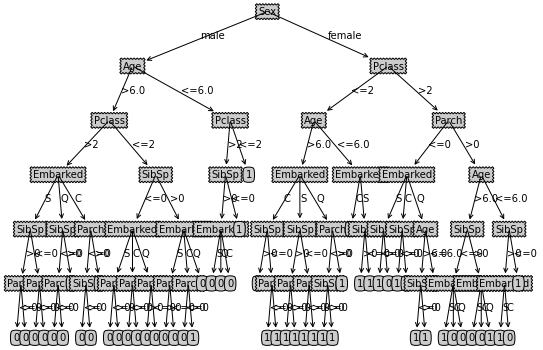

In [236]:
createPlot(My_tree)

In [ ]:
# #后剪枝

# def PostPruningOnce(tree,data):
#     tree_copy0 = tree
#     tree_copy1 = tree
#     nodeName =list(tree_copy0.keys())
#     for i in nodeName:
#         nodeValue = tree_copy0[i]
#         if type(nodeValue) == dict:
#             PostPruningOnce(tree_copy0[i])
#         else:
#             tree_copy0 = 0
#             tree_copy1 = 1
#     return tree_copy0,tree_copy1



    


In [238]:
#随机森林的样本分割
from random import seed
from random import randrange

# 将数据集随机分成N块,每块占据原来数据集的百分之八十
def spiltDataSet(dataSet, n_folds):
    fold_size = int(len(dataSet)*0.8) 
    dataSet_spilt = []
    for i in range(n_folds):
        fold = []
        dataSet_copy = list(np.array(dataSet))
        while len(fold) < fold_size:
            index = randrange(len(dataSet_copy))
            fold.append(dataSet_copy.pop(index))
        dataSet_spilt.append(fold)
    return dataSet_spilt

def gettrainDataSet(dataSet):
    fold_size = int(len(dataSet)*0.2) 
    fold = []
    dataSet_copy = list(np.array(dataSet))
    while len(fold) < fold_size:
        index = randrange(len(dataSet_copy))
        fold.append(dataSet_copy.pop(index))
    dataSet_spilt = fold
    return dataSet_spilt


In [239]:
pd.DataFrame(gettrainDataSet(data)).shape

(178, 7)

In [240]:
n_subsets=25
a=spiltDataSet(data,n_subsets)
for i in range(len(a)):
    a[i]= pd.DataFrame(a[i],columns=data.columns)
a[0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,<=2,male,>6.0,>0,<=0,S
1,0,>2,female,>6.0,>0,>0,S
2,0,>2,male,>6.0,<=0,<=0,S
3,1,<=2,female,>6.0,<=0,<=0,S
4,0,<=2,male,>6.0,>0,<=0,S
...,...,...,...,...,...,...,...
707,0,<=2,male,>6.0,<=0,<=0,S
708,0,>2,male,>6.0,<=0,<=0,S
709,0,>2,male,>6.0,<=0,<=0,C
710,1,<=2,female,>6.0,<=0,>0,S


In [241]:
def randomforest(data,n_subsets,rowData):
    a=spiltDataSet(data,n_subsets)
    result_set = []
    ans={}
    for i in range(len(a)):
        a[i] = pd.DataFrame(a[i],columns=data.columns)
        tree = build_tree(a[i])
        result_set.append(dtClassify(tree, rowData, data.columns))
    for j in result_set:
        if j not in ans:
            ans[j] = 0
        ans[j]+=1
    ans = sorted(ans.items(),key= lambda x:x[1] , reverse= True)
    return ans[0][0]
                


In [242]:
randomforest(data,25,data.iloc[25,:])

0

In [243]:
def adaboosting(data,n_subsets,iters):
    a= spiltDataSet(data,n_subsets)
    train_data = pd.DataFrame(gettrainDataSet(data),columns=data.columns)
    D=np.ones(len(train_data))/len(train_data)
    weight=np.zeros(n_subsets)
    forest = []
    accuracy_set={}
    col = data.columns
    for x in range(iters):
        for i in range(len(a)):
            a[i] = pd.DataFrame(a[i],columns=data.columns)
            tree = build_tree(a[i])
            forest.append(tree)
        for i in range(len(a)):
            accuracy = 0
            for j in range(len(train_data)):
                ans = dtClassify(forest[i],train_data.iloc[j,:],col)
                if ans == train_data.iloc[j,0]:
                    accuracy += D[j]
            accuracy = 1-accuracy
            accuracy_set[i] = accuracy
        acc_set = sorted(accuracy_set.items(),key = lambda x:x[1])
        acc = acc_set[0][1]
        alpha = 0.5*log((1-acc)/acc, e)
        weight[acc_set[0][0]] = alpha
        for j in range(len(train_data)):
            ans = dtClassify(forest[acc_set[0][0]],train_data.iloc[j,:],col)
            sum0 = 0
            for i in range(len(D)):
                sum0 += i
            if  ans == train_data.iloc[j,0]:
                D[j]=D[j]*e**(-alpha)/sum0
            else:
                D[j]=D[j]*e**alpha/sum0
    sum1 = 0
    for i in weight:
        sum1 += i
    for i in range(len(weight)):
        weight[i] /= sum1
    return forest , weight


In [244]:
a,b = adaboosting(data,4,5)
b
#有一些小bug还没来得及调整

array([-0.        , -0.        , -0.09593469,  1.09593469])